Processing chunks: 197it [00:31,  6.18it/s]


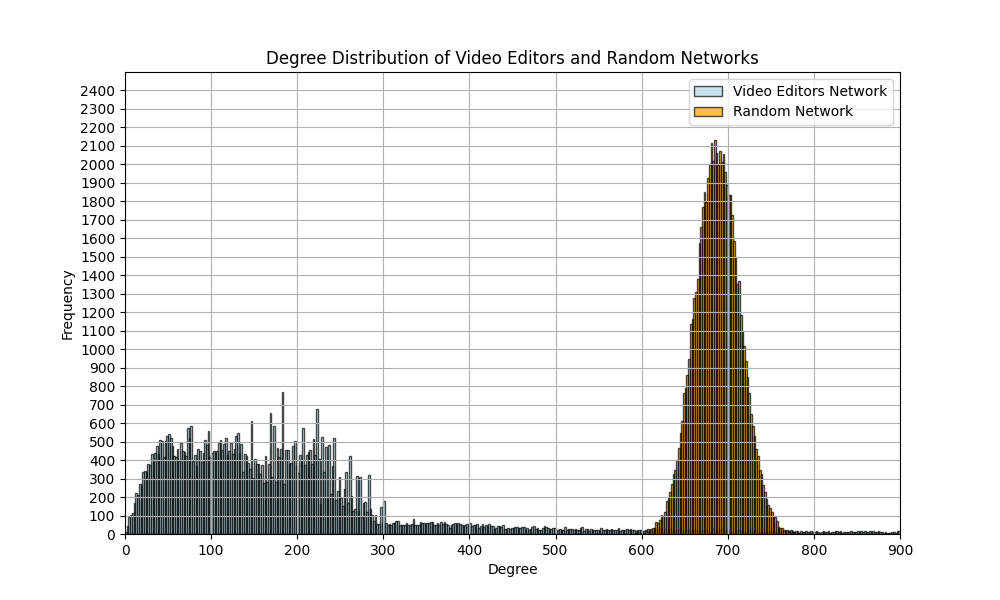

In [3]:
%matplotlib ipympl
import pandas as pd
import networkx as nx
from itertools import combinations
import random
from tqdm import tqdm
import matplotlib.pyplot as plt

# G2 (video_editors.csv)
file_path = 'video_editors.csv'
G2 = nx.Graph()
editor_to_node = {}

def get_or_create_node(editor):
    if editor not in editor_to_node:
        node_id = len(editor_to_node)
        editor_to_node[editor] = node_id
        G2.add_node(node_id)
    return editor_to_node[editor]

def process_edges(df):
    edges_to_add = []
    for _, group in df.groupby('item'):
        editors = group['editor'].dropna().unique()
        if len(editors) > 1:
            editor_nodes = [get_or_create_node(editor) for editor in editors]
            editor_combinations = combinations(editor_nodes, 2)
            for edge in editor_combinations:
                if edge[0] is not None and edge[1] is not None:
                    edges_to_add.append(edge)
    return edges_to_add

chunksize = 10000
for chunk in tqdm(pd.read_csv(file_path, dtype={'item': str, 'editor': str}, chunksize=chunksize), desc="Processing chunks"):
    chunk = chunk[chunk['editor'].notna()]
    chunk = chunk[chunk['editor'].str.strip() != '']
    edges = process_edges(chunk)
    if edges:
        G2.add_edges_from(edges)

# R2 (Random Network)
# nodes
num_nodes = 68741


connection_prob = 0.01


R2 = nx.erdos_renyi_graph(n=num_nodes, p=connection_prob)

# Degree Distribution
degree_distribution_G2 = [d for _, d in G2.degree()]
degree_distribution_R2 = [d for _, d in R2.degree()]

# Plot
plt.figure(figsize=(10, 6))
bins = range(0, 901, 2)  
plt.hist(degree_distribution_G2, bins=bins, alpha=0.7, color='lightblue', edgecolor='black', label='Video Editors Network')
plt.hist(degree_distribution_R2, bins=bins, alpha=0.7, color='orange', edgecolor='black', label='Random Network')
plt.title('Degree Distribution of Video Editors and Random Networks')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.xlim(0, 900)  
plt.ylim(0, 2500)  
y_ticks = list(range(0, 2500, 100))  
plt.yticks(y_ticks)
plt.legend()
plt.grid(True)
plt.show()

Processing chunks: 744it [01:41,  7.33it/s]


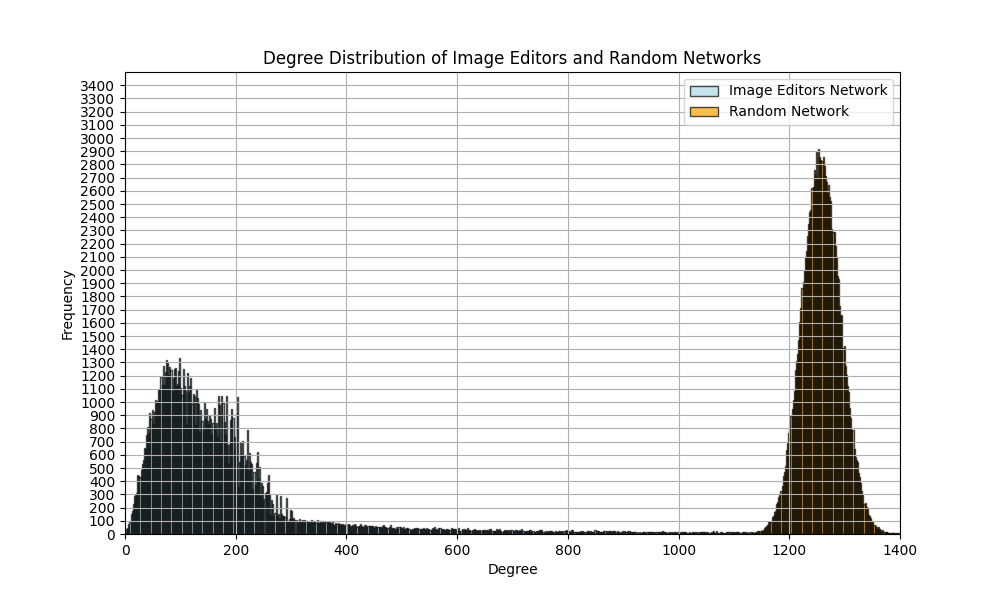

In [1]:
%matplotlib ipympl
import pandas as pd
import networkx as nx
from itertools import combinations
import random
from tqdm import tqdm
import matplotlib.pyplot as plt

# G3 (video_editors.csv)
file_path = 'image_editors.csv'
G3 = nx.Graph()
editor_to_node = {}

def get_or_create_node(editor):
    if editor not in editor_to_node:
        node_id = len(editor_to_node)
        editor_to_node[editor] = node_id
        G3.add_node(node_id)
    return editor_to_node[editor]

def process_edges(df):
    edges_to_add = []
    for _, group in df.groupby('item'):
        editors = group['editor'].dropna().unique()
        if len(editors) > 1:
            editor_nodes = [get_or_create_node(editor) for editor in editors]
            editor_combinations = combinations(editor_nodes, 2)
            for edge in editor_combinations:
                if edge[0] is not None and edge[1] is not None:
                    edges_to_add.append(edge)
    return edges_to_add

chunksize = 10000
for chunk in tqdm(pd.read_csv(file_path, dtype={'item': str, 'editor': str}, chunksize=chunksize), desc="Processing chunks"):
    chunk = chunk[chunk['editor'].notna()]
    chunk = chunk[chunk['editor'].str.strip() != '']
    edges = process_edges(chunk)
    if edges:
        G3.add_edges_from(edges)

# R3 
# Nodes
num_nodes = 125705

connection_prob = 0.01

R3 = nx.erdos_renyi_graph(n=num_nodes, p=connection_prob)

# Degree Distribution
degree_distribution_G3 = [d for _, d in G3.degree()]
degree_distribution_R3 = [d for _, d in R3.degree()]

# Plot
plt.figure(figsize=(10, 6))
bins = range(0, 1400, 2)  
plt.hist(degree_distribution_G3, bins=bins, alpha=0.7, color='lightblue', edgecolor='black', label='Image Editors Network')
plt.hist(degree_distribution_R3, bins=bins, alpha=0.7, color='orange', edgecolor='black', label='Random Network')
plt.title('Degree Distribution of Image Editors and Random Networks')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.xlim(0, 1400) 
plt.ylim(0, 3500)  
y_ticks = list(range(0, 3500, 100))  
plt.yticks(y_ticks)
plt.legend()
plt.grid(True)
plt.show()
